## Gradient Descent

Gradient Descent is an iterative optimization algorithm used to minimize the cost function in regression problems, like predicting housing prices. It updates the model's parameters, typically the weights, in the direction that reduces the cost function's value the most.

In the code I provided, the cost function is defined as the Mean Squared Error (MSE) between the predicted values and the actual values. The algorithm updates the weights by taking the derivative of the cost function with respect to each weight, then moving the weights in the opposite direction of the gradient.

The update rule for the weight vector \\( \theta \\) in batch gradient descent can be represented as:

$$ \theta_{\text{new}} = \theta - \alpha \cdot \frac{1}{m} \cdot X^T \cdot (X \cdot \theta - y) $$

Here:

\\( \theta \\) is the weight vector.  
\\( \alpha \\) is the learning rate, a hyperparameter that controls the size of the steps taken.  
\\( m \\) is the number of instances in the dataset.  
\\( X \\) is the matrix of input features.  
\\( y \\) is the vector of target values.

The cost function \\( J(\theta) \\) used in the code is the MSE, given by:

\\[ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (X \cdot \theta - y)^2 \\]

By iteratively applying this update rule for a number of iterations, the weights converge to the values that minimize the cost function.


In [3]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Data Loading and Preprocessing

We start by loading the dataset, splitting it into training and test sets, and then standardizing the features to prepare for Gradient Descent optimization.


In [4]:
# Load the California housing dataset
housing = fetch_california_housing()
X_housing = housing.data
y_housing = housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Add a column of ones to the data to act as the intercept term
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

## Gradient Descent Optimization

Next, we initialize the weights and define the Gradient Descent function, which will iteratively update the weights to minimize the cost function.


In [6]:
# Initialize weights
theta = np.random.rand(X_train_scaled.shape[1])

# Gradient Descent Function
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        prediction = np.dot(X, theta)
        error = prediction - y
        cost = (1 / (2 * m)) * np.dot(error.T, error)
        theta = theta - (learning_rate / m) * np.dot(X.T, error)
        cost_history.append(cost)
    return theta, cost_history


## Model Training

We run the Gradient Descent algorithm with our training data and visualize the cost over iterations to ensure it's decreasing.


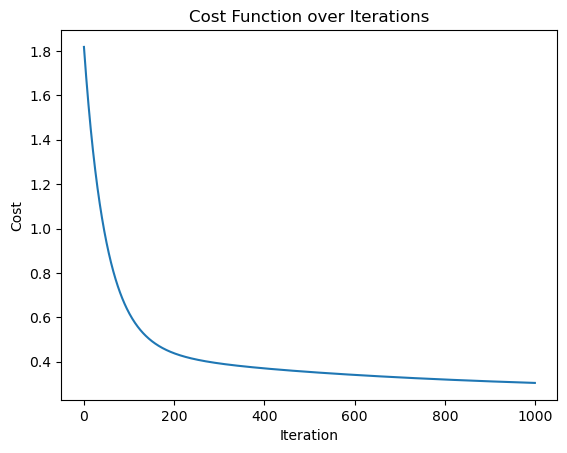

In [11]:
# Set learning rate and number of iterations
learning_rate = 0.01
iterations = 1000

# Perform Gradient Descent
theta_final, cost_history = gradient_descent(X_train_scaled, y_train, theta, learning_rate, iterations)

# Plot the cost history
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

## Model Evaluation

After training the model, we evaluate its performance using Mean Squared Error and R² score on the test set.


In [12]:
# Predict on the test set
y_pred = np.dot(X_test_scaled, theta_final)

# Calculate Mean Squared Error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model evaluation metrics
print(f'Mean Squared Error: {mse:.3f}')
print(f'R2 Score: {r2:.3f}')

Mean Squared Error: 0.623
R2 Score: 0.524


## Prediction vs Actual Comparison

Finally, we plot the predicted versus actual values to visually assess how well our model is performing.


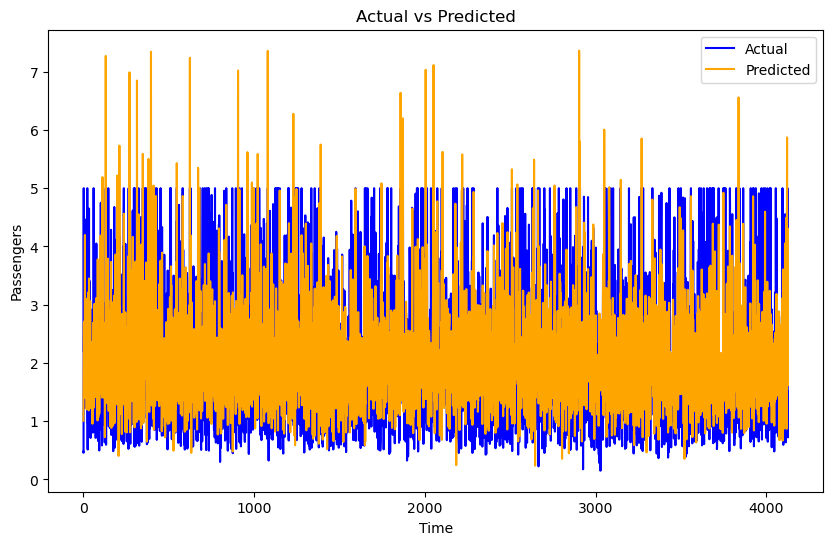

In [9]:
import matplotlib.pyplot as plt

time = range(len(y_test))  # This could also be a specific time feature if available

plt.figure(figsize=(10, 6))  # Set the figure size as desired
plt.plot(time, y_test, label='Actual', color='blue')  # Plot the actual values
plt.plot(time, y_pred, label='Predicted', color='orange')  # Plot the predicted values
plt.xlabel('Time')  # Label for the x-axis
plt.ylabel('Passengers')  # Label for the y-axis (or replace with appropriate label)
plt.title('Actual vs Predicted')  # Title of the plot
plt.legend()  # Show the legend
plt.show()  # Display the plot

In [10]:
# Output final model parameters
print(f'Final model parameters: {theta_final}')

Final model parameters: [ 2.07189501  0.86820022  0.22486083 -0.14048437  0.12519669  0.03302779
 -0.05062098 -0.11004893 -0.07573499]


## Conclusion

The model built using Gradient Descent has given us a practical way to predict housing prices. The Mean Squared Error of 0.623 shows that our predictions are fairly close to the real prices, though not perfect. With an R² score of 0.524, the model explains more than half the variability of the data, which is a good start for this kind of analysis.

The plot of actual vs. predicted prices reveals that the model can track the general trend in housing prices. However, it also shows that our predictions are not always on target, suggesting there is room for the model to get better.

The final parameters of our model reflect how each feature influences the predicted price. These results can guide further improvements to the model, like adjusting features or trying more advanced techniques.

In short, the model is a solid first step in predicting housing prices and can be further refined for better accuracy.